# Ungraded Lab: Statistical Analysis Lab

## Overview 
In this lab, you'll analyze EngageMetrics' approach to flexible work arrangements by investigating whether work modes (REMOTE, HYBRID, ONSITE) influence promotion eligibility. As a leading analytics company that helps businesses optimize their digital marketing strategies, EngageMetrics applies the same data-driven approach to their internal workforce decisions. Through progressively independent analysis, you'll use their employee_insights_cleanded dataset to test relationships between work arrangements and career advancement opportunities.

This continues your exploration of EngageMetrics' workforce data, building on your previous course activities to now focus on how the company's commitment to flexible work policies aligns with their emphasis on employee development and career growth. You'll form hypotheses, conduct statistical tests, and draw conclusions that could help EngageMetrics optimize their approach to remote work and promotion decisions.

Pro tip: Keep the course screencasts handy while working through this lab. Even experienced developers regularly refer back to documentation and examples.

## Learning Outcomes 
By the end of this lab, you will be able to:
- Form and test statistical hypotheses about workplace relationships
- Conduct chi-square tests to analyze categorical relationships
- Interpret statistical test results in business context
- Visualize relationships between variables

## Dataset Information 
The <b>employee_insights_cleaned dataset</b> contains employee records including:
- work_mode (REMOTE, HYBRID, ONSITE)
- promotion_eligible (Y/N)
- department
- work_experience (years)
- satisfaction_score
- projects_completed

## Activities
### Activity 1: Hypothesis Formation and Initial Exploration

<b>Step 1:</b> Form Your Hypothesis. Before examining the data:
1. What factors might influence the relationship between work mode and promotions?
2. Write your hypothesis about this relationship.
3. Document your reasoning.

Discussion prompts:
- How might different work modes affect visibility for promotion?
- Could department or experience levels impact this relationship?
-What other factors should we consider?

<b>Tip:</b> Consider both direct and indirect factors that might influence promotion eligibility.

Document your hypothesis here using markdown

<b>Step 2:</b> Import necessary libraries and preview data

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('employee_insights_cleaned.csv')
df.head()

,employee_id,age,salary,promotion_eligible,last_training_date,department,work_experience,projects_completed,hours_worked_weekly,work_mode,last_promotion_date,satisfaction_score,overtime_hours
0,E0001,53,56910,Y,2022-01-02,It,9,14,44.286826,ONSITE,2020-01-31,9.9,2.1
1,E0002,39,50206,Y,2022-01-09,Hr,12,4,48.524347,ONSITE,2020-02-29,6.8,3.8
2,E0003,32,73419,Y,2022-01-16,Sales,1,9,49.179871,REMOTE,2020-03-31,9.5,9.3
3,E0004,45,100636,Y,2022-01-23,Sales,1,6,50.569759,REMOTE,2020-04-30,4.7,7.2
4,E0005,43,100015,Y,2022-01-30,Hr,15,13,48.605291,HYBRID,2020-05-31,8.3,0.5


<b>Step 3:</b> Initial Data Exploration

Work Mode Distribution:
work_mode
HYBRID    35
REMOTE    33
ONSITE    32
Name: count, dtype: int64

Promotion Eligibility Rates:
promotion_eligible
N    56
Y    44
Name: count, dtype: int64


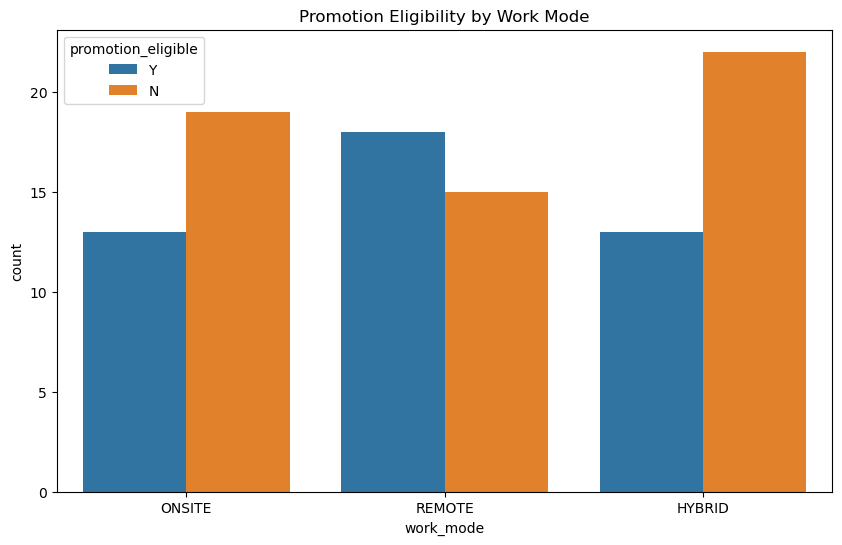

In [2]:
# Examine work mode distribution
print("Work Mode Distribution:")
print(df['work_mode'].value_counts())
print("\nPromotion Eligibility Rates:")
print(df['promotion_eligible'].value_counts())

# Basic relationship visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_mode', hue='promotion_eligible')
plt.title('Promotion Eligibility by Work Mode')
plt.show()

### Activity 2: Statistical Analysis

<b>Step 1:</b> Create a contingency table examining work_mode and promotion_eligible

Questions to consider:
- What patterns do you notice in the contingency table?
- Do these patterns align with your hypothesis?

In [7]:
# YOUR CODE HERE
contingency_table = pd.crosstab(df['work_mode'], df['promotion_eligible'])
print("Contingency Table:")
print(contingency_table)

Contingency Table:
promotion_eligible   N   Y
work_mode                 
HYBRID              22  13
ONSITE              19  13
REMOTE              15  18


<b>Tip:</b> Consider using pd.crosstab()

<b>Step 2:</b> Conduct Perform Chi-Square Test to examine the relationship.

Questions:
- What does the p-value tell us?
- How strong is the relationship?

In [8]:
# YOUR CODE HERE
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Chi-Square Test Results:
Chi2 Statistic: 2.305207981953112
p-value: 0.3158133226779341
Degrees of Freedom: 2
Expected Frequencies:
[[19.6  15.4 ]
 [17.92 14.08]
 [18.48 14.52]]


<b>Tip:</b> Use chi2_contingency() from scipy.stats

### Activity 3: Advanced Analysis 

<b>Step 1:</b> Investigate Confounding Factors. Analyze how other factors might influence the relationship:
1. Examine promotion rates by department within each work mode
2. Consider work experience as a factor
3. Visualize any patterns you find

Promotion Rate by Department & Work Mode:
promotion_eligible           N         Y
department work_mode                    
Finance    HYBRID     0.250000  0.750000
           ONSITE     0.666667  0.333333
           REMOTE     0.500000  0.500000
Hr         HYBRID     0.666667  0.333333
           ONSITE     0.500000  0.500000
           REMOTE     0.666667  0.333333
It         HYBRID     0.750000  0.250000
           ONSITE     0.714286  0.285714
           REMOTE     0.333333  0.666667
Marketing  HYBRID     1.000000  0.000000
           ONSITE     0.250000  0.750000
           REMOTE     1.000000  0.000000
Operations HYBRID     0.500000  0.500000
           ONSITE     0.666667  0.333333
           REMOTE     0.571429  0.428571
Sales      HYBRID     0.750000  0.250000
           ONSITE     0.666667  0.333333
           REMOTE     0.111111  0.888889

Promotion Rate by Work Experience:
promotion_eligible         N         Y
work_experience                       
1                   0.55

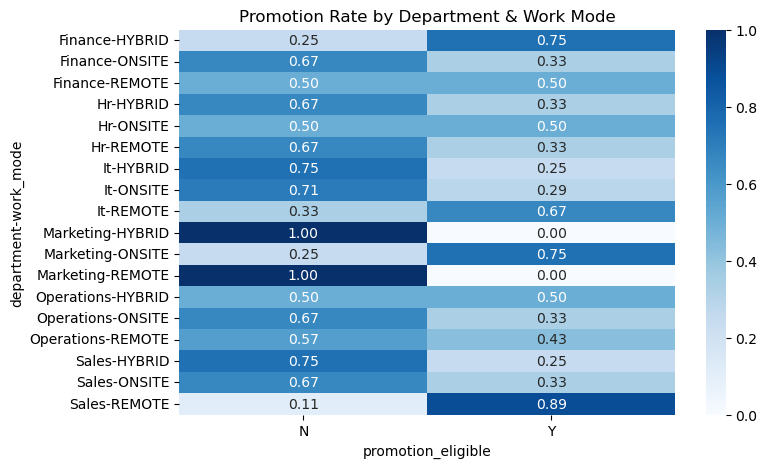

In [9]:
# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1.1: 分部門觀察 (Promotion Rate by Department & Work Mode)
dept_table = pd.crosstab([df['department'], df['work_mode']], df['promotion_eligible'], normalize='index')
print("Promotion Rate by Department & Work Mode:")
print(dept_table)

# Step 1.2: 考慮工作年資 (Work Experience Factor)
exp_table = pd.crosstab(df['work_experience'], df['promotion_eligible'], normalize='index')
print("\nPromotion Rate by Work Experience:")
print(exp_table)

# Step 1.3: 視覺化
plt.figure(figsize=(8,5))
sns.heatmap(dept_table, annot=True, cmap="Blues", fmt=".2f")
plt.title("Promotion Rate by Department & Work Mode")
plt.show()


<b>Tip:</b> Apply your previous learning

<b>Step 2:</b> Interpret and Summarize your Results using Markdown. Create a comprehensive analysis:
1. Summarize your statistical findings

2. Provide business recommendations based on your analysis

3. Remember to consider practical significance alongside statistical significance


Document your results here using markdown

## Success Checklist
- Formed clear hypothesis with supporting reasoning
- Properly conducted chi-square test
- Created informative visualizations
- Considered confounding factors
- Provided business-relevant interpretation

## Common Issues & Solutions 
- Problem: Unclear hypothesis formation 
    - Solution: Consider all potential factors before forming hypothesis
- Problem: Difficulty interpreting chi-square results 
    - Solution: Remember to examine both statistical significance (p-value) and practical significance
- Problem: Confounding factors overlooked 
    - Solution: Always consider how other variables might influence the relationship
    
## Summary
Through progressively independent analysis, you've learned to transform HR questions into testable hypotheses, conduct statistical tests, and draw meaningful conclusions about workplace relationships - skills that will help you make data-driven recommendations about flexible work policies and career advancement opportunities.

### Key Points
- Statistical analysis begins with clear hypothesis formation
- Consider multiple factors when interpreting relationships
- Business context is crucial for meaningful insights
- Visualization supports statistical findings

## Solution Code
Stuck on your code or want to check your solution? Here's a complete reference implementation to guide you. This represents just one effective approach—try solving independently first, then use this to overcome obstacles or compare techniques. The solution is provided to help you move forward and explore alternative approaches to achieve the same results. Happy coding!

### Activity 1: Hypothesis Formation and Initial Exploration - Solution Code

#### Step 1: Form Your Hypothesis

Hypothesis

H0 (Null Hypothesis): Work mode (REMOTE, HYBRID, ONSITE) has no effect on promotion eligibility.
    
H1 (Alternative Hypothesis): Work mode does influence promotion eligibility — employees in certain work modes (e.g., ONSITE) are more or less likely to be promoted.

    
Reasoning

Visibility & Presence: Onsite employees may have more opportunities to demonstrate their value through in-person interactions.

Collaboration Opportunities: Physical presence could lead to more involvement in key initiatives.

Organizational Bias: Some managers may unconsciously prefer promoting those they see regularly.

Contextual Factors: Department type and experience level could mediate the relationship between work mode and promotions.

Work Mode Distribution:
work_mode
HYBRID    35
REMOTE    33
ONSITE    32
Name: count, dtype: int64

Promotion Eligibility Rates:
promotion_eligible
N    56
Y    44
Name: count, dtype: int64


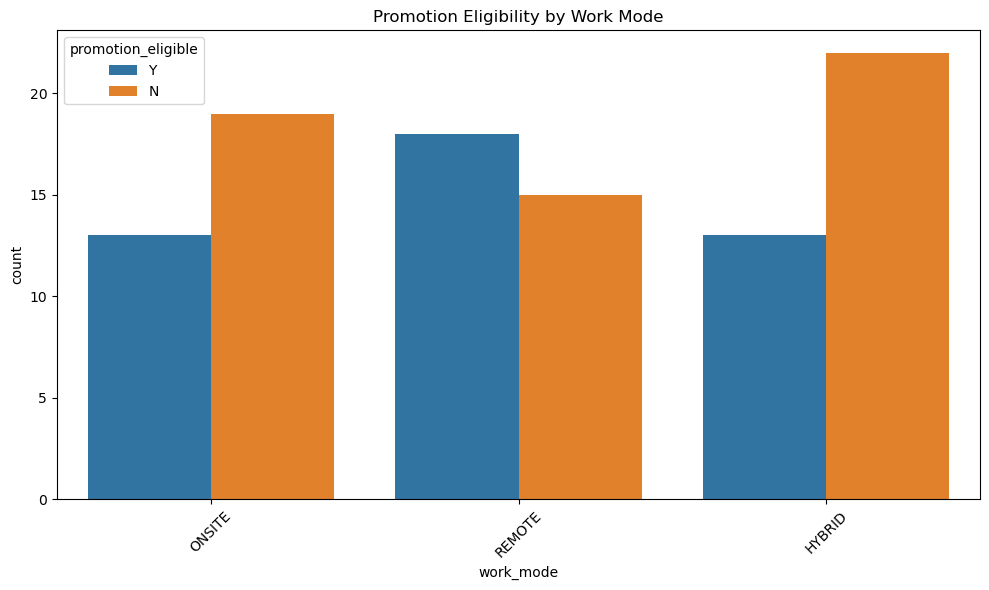

In [3]:
# Step 2: Import necessary libraries and preview data

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('employee_insights_cleaned.csv')

# Step 3: Initial Data Exploration

# Initial exploration
print("Work Mode Distribution:")
print(df['work_mode'].value_counts())
print("\nPromotion Eligibility Rates:")
print(df['promotion_eligible'].value_counts())

# Visualization of basic relationship
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_mode', hue='promotion_eligible')
plt.title('Promotion Eligibility by Work Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Activity 2: Statistical Analysis - Solution Code

In [5]:
# Step 1: Create contingency table
contingency_table = pd.crosstab(df['work_mode'], df['promotion_eligible'])
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

Contingency Table:
promotion_eligible   N   Y
work_mode                 
HYBRID              22  13
ONSITE              19  13
REMOTE              15  18

Chi-square test results:
Chi-square statistic: 2.3052
p-value: 0.3158
Degrees of freedom: 2


### Activity 3: Advanced Analysis - Solution Code

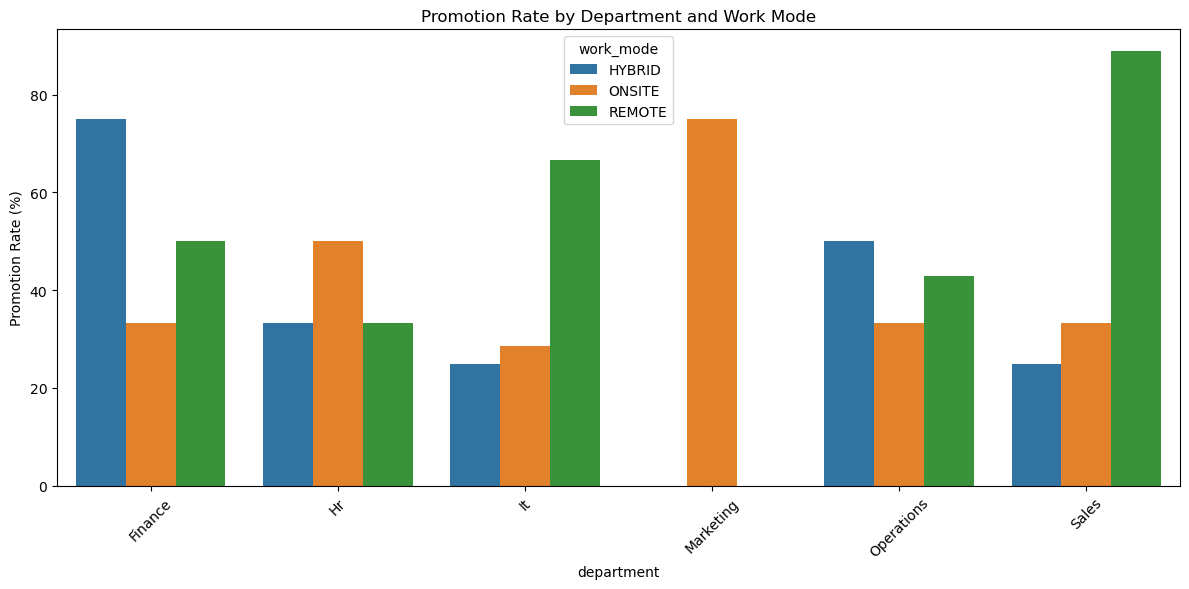

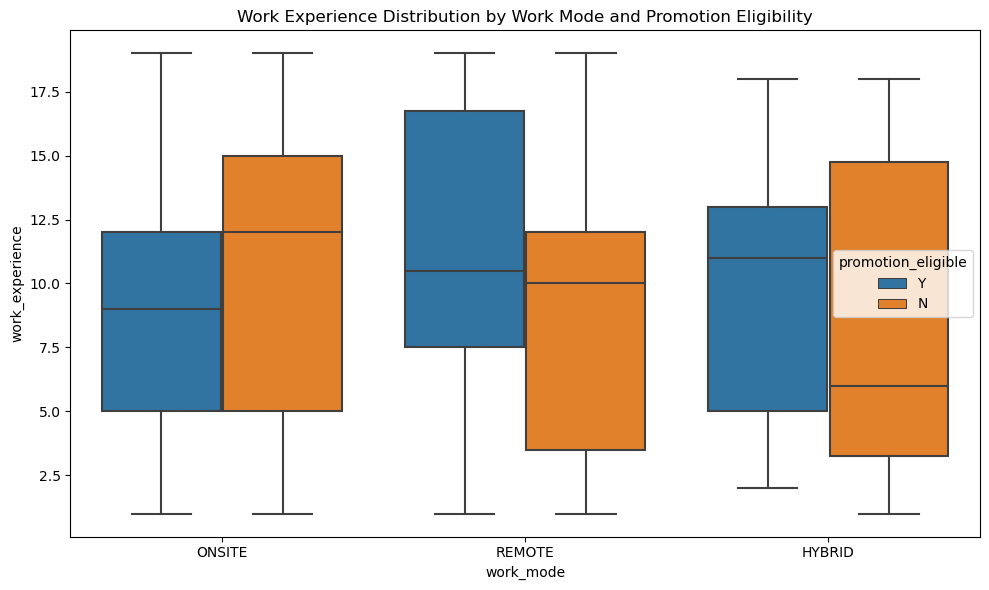


Promotion Rate by Experience Quartile:
work_experience
(0.999, 4.0]     32.142857
(4.0, 10.0]      50.000000
(10.0, 15.25]    47.619048
(15.25, 19.0]    48.000000
Name: Y, dtype: float64


In [4]:
# Step 1: Investigate Confounding Factors

# Analyze by department
plt.figure(figsize=(12, 6))
dept_work_promotion = pd.crosstab([df['department'], df['work_mode']],
                                 df['promotion_eligible'], 
                                 normalize='index') * 100

dept_work_promotion['promotion_rate'] = dept_work_promotion['Y']
dept_work_promotion_plot = dept_work_promotion.reset_index()

sns.barplot(data=dept_work_promotion_plot, 
            x='department', 
            y='promotion_rate', 
            hue='work_mode')
plt.title('Promotion Rate by Department and Work Mode')
plt.xticks(rotation=45)
plt.ylabel('Promotion Rate (%)')
plt.tight_layout()
plt.show()

# Analyze by experience
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_mode', y='work_experience', hue='promotion_eligible')
plt.title('Work Experience Distribution by Work Mode and Promotion Eligibility')
plt.tight_layout()
plt.show()

# Experience and promotion eligibility correlation
experience_promotion = pd.crosstab(pd.qcut(df['work_experience'], 4), 
                                 df['promotion_eligible'], 
                                 normalize='index') * 100
print("\nPromotion Rate by Experience Quartile:")
print(experience_promotion['Y'])

#### Summary Analysis Report

1. Statistical Findings

    - A chi-square test was conducted to assess the relationship between work mode (REMOTE, HYBRID, ONSITE) and promotion eligibility:
        - Chi-square statistic: 2.3052
        - Degrees of freedom: 2
        - p-value: 0.3158
Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This suggests no statistically significant association between work mode and promotion eligibility.

2. Business Recommendations

    - There is no evidence of promotion bias based on work mode.

    - Continue monitoring promotion trends as flexible work arrangements evolve.

    - Ensure promotion decisions are based on clear, measurable criteria.

    - Maintain practices that support visibility and inclusion for all work modes.